# Differential expression and gene ontolgies of endothelial integrated SEACells: Ascites

In [1]:
import os
import logging
import shutil

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import colors
from matplotlib import rcParams

In [4]:
from gprofiler import GProfiler

In [5]:
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.2
-----
PIL                 10.0.0
anyio               NA
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
brotli              1.0.9
certifi             2023.07.22
cffi                1.15.0
charset_normalizer  3.2.0
comm                0.1.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
exceptiongroup      1.1.3
executing           1.2.0
fastjsonschema      NA
gprofiler           1.0.0
h5py                3.9.0
idna                3.4
igraph              0.10.6
importlib_resources NA
ipykernel           6.25.0
ipywidgets          8.1.0
jedi                0.19.0
jinja2              3.1.2
joblib              1.3.2
json5               NA
jsonschema          4.17.3
jupyter_events      0.6.3
jupyter_server      2.7.3
jupyterlab_server   2.24.0
kiwisolver          1.4.5
leidenalg           0

In [7]:
pwd

'/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/endothelial'

In [8]:
import sys
sys.path.insert(1, '/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/cancer')

In [9]:
from plotting_bubble import scale_data_5_75, plot_enrich 

In [10]:
adata = sc.read('/group/testa/Project/OvarianAtlas/Integrated_data_hdg_new/seacells_endothelial_hdg_patients_batch_corr_scgen_tissuetreat.h5ad')
# adata = sc.read('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/seacells_cancer_hdg_patients_batch_corr_scgen_tissuetreat.h5ad')

In [11]:
adata

AnnData object with n_obs × n_vars = 2778 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', '_scvi_batch', '_scvi_labels', 'concat_batch'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [12]:
adata.obs = adata.obs.drop(columns=['_scvi_batch', '_scvi_labels', 'concat_batch'])

In [13]:
hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/Atlas_scripts/HVG/atlas_cancer_hdg_dispersion_patients.csv',  index_col=0)
# hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/atlas_project/script/hdg/cancer/atlas_cancer_hdg_dispersion_patients.csv',  index_col=0)

In [14]:
hvg[hvg.highly_variable]

,highly_variable
FAM87B,True
SAMD11,True
PLEKHN1,True
HES4,True
ISG15,True
...,...
MT-ND3,True
MT-ND4L,True
MT-ND5,True
MT-ND6,True


In [15]:
hvg.highly_variable.sum()

5028

In [16]:
adata.var

""
FAM87B
LINC00115
FAM41C
SAMD11
NOC2L
...
MT-ND4L
MT-ND4
MT-ND5
MT-ND6


In [17]:
adata.var['highly_variable']=hvg.highly_variable

In [18]:
adata.var

,highly_variable
FAM87B,True
LINC00115,NaN
FAM41C,NaN
SAMD11,True
NOC2L,NaN
...,...
MT-ND4L,True
MT-ND4,NaN
MT-ND5,True
MT-ND6,True


In [19]:
adata.var.highly_variable = adata.var.highly_variable.fillna(False)

In [20]:
adata.var

,highly_variable
FAM87B,True
LINC00115,False
FAM41C,False
SAMD11,True
NOC2L,False
...,...
MT-ND4L,True
MT-ND4,False
MT-ND5,True
MT-ND6,True


In [21]:
# you can skip this passage if you specify use_highly_variable = True when computing embeddings
# adata.raw = adata
# adata = adata[:, adata.var.highly_variable]

In [22]:
adata.var_names

Index(['FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=17054)

In [23]:
cell_cycle_genes = [x.strip() for x in open('/home/marta.sallese/ov_cancer_atlas/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [24]:
adata.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,SEACell,# Single Cells,tissue-treatment,S_score,G2M_score,phase
SEACell_patient_tissue,,,,,,,,,,,,,,
SEACell-8_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-8,55,Metastasis_CHT,0.104870,0.029123,S
SEACell-6_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-6,97,Metastasis_CHT,-0.278455,-0.382995,G1
SEACell-3_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-3,40,Metastasis_CHT,0.066609,-0.050996,S
SEACell-5_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-5,84,Metastasis_CHT,0.101556,0.029559,S
SEACell-7_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-7,97,Metastasis_CHT,-0.290593,-0.484180,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEACell-26_Vasquez_118_Primary,Primary,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Ovary,Vasquez,SEACell-26,55,Primary_Naive,-0.430463,-0.612138,G1
SEACell-26_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-26,18,Metastasis_Naive,-0.612018,-0.779111,G1
SEACell-38_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-38,10,Metastasis_Naive,-0.644089,-0.845210,G1


### Ascites

In [25]:
adata_as = adata[(adata.obs['tissue'] == 'Ascites')]

In [26]:
adata_as

View of AnnData object with n_obs × n_vars = 329 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', 'S_score', 'G2M_score', 'phase'
    var: 'highly_variable'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [27]:
sc.tl.pca(adata_as, use_highly_variable = True)

In [28]:
sc.pp.neighbors(adata_as, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata_as)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marta.sallese/miniconda3/envs/gprofiler/lib/

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


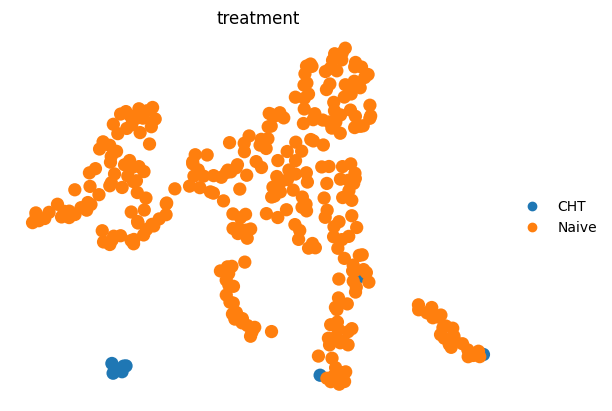

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


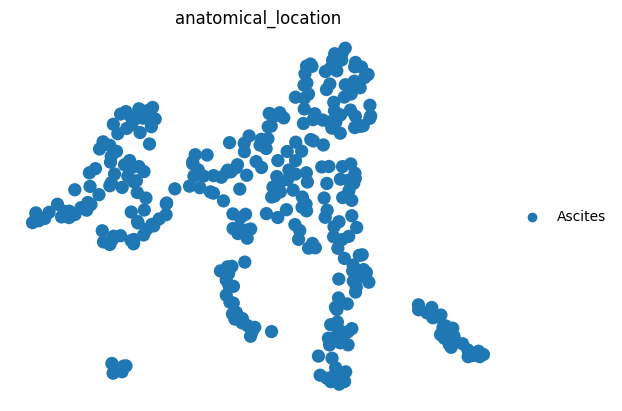

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


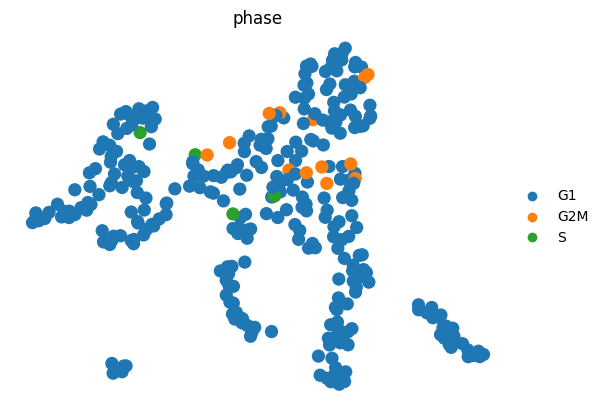

In [29]:
sc.pl.umap(adata_as, color=["treatment"], frameon=False)
sc.pl.umap(adata_as, color=["anatomical_location"], frameon=False)
sc.pl.umap(adata_as, color=["phase"], frameon=False)

In [30]:
leidenTotal=[]
for i in np.arange(0.01, 2.0, 0.1):
    sc.tl.leiden(adata_as,resolution = i,key_added="leiden-{}".format(round(i,2)))
    leidenTotal.append("leiden-{}".format(round(i,2)))

In [31]:
leidenTotal

['leiden-0.01',
 'leiden-0.11',
 'leiden-0.21',
 'leiden-0.31',
 'leiden-0.41',
 'leiden-0.51',
 'leiden-0.61',
 'leiden-0.71',
 'leiden-0.81',
 'leiden-0.91',
 'leiden-1.01',
 'leiden-1.11',
 'leiden-1.21',
 'leiden-1.31',
 'leiden-1.41',
 'leiden-1.51',
 'leiden-1.61',
 'leiden-1.71',
 'leiden-1.81',
 'leiden-1.91']

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


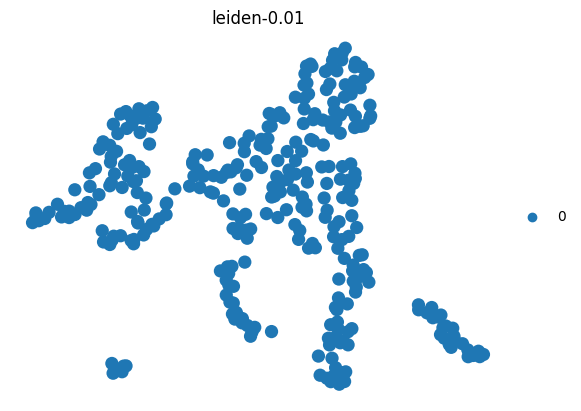

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


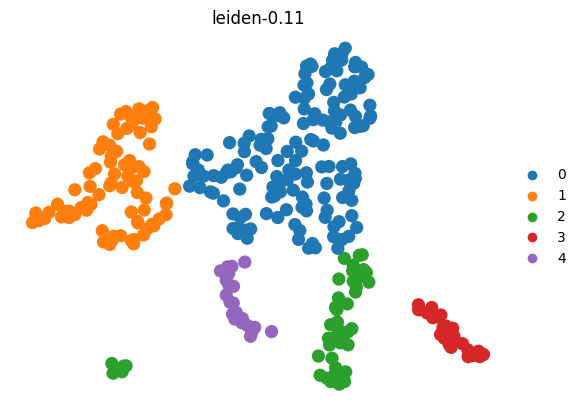

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


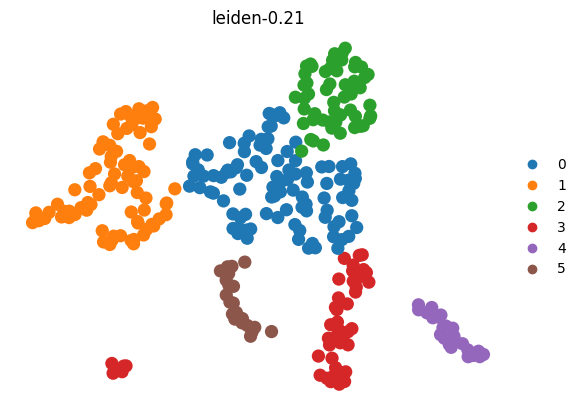

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


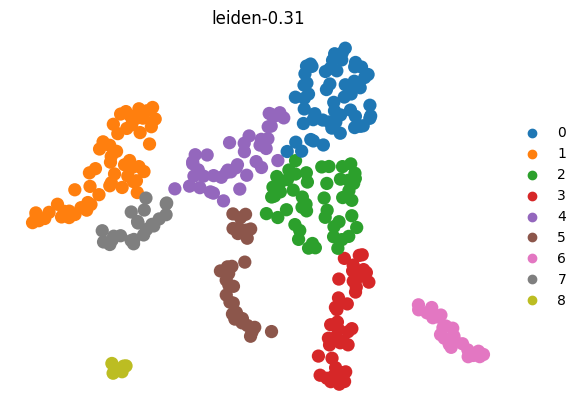

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


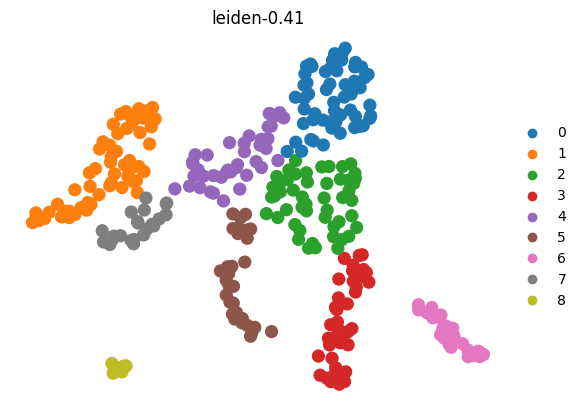

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


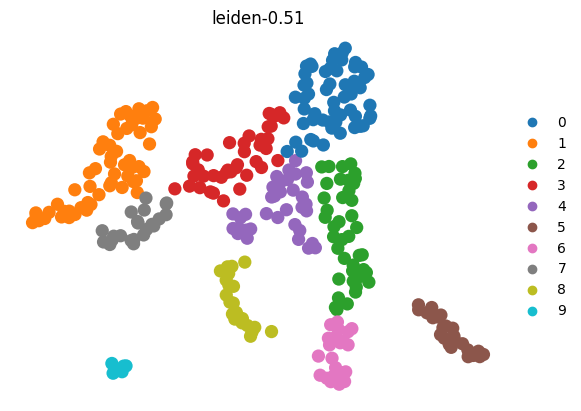

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


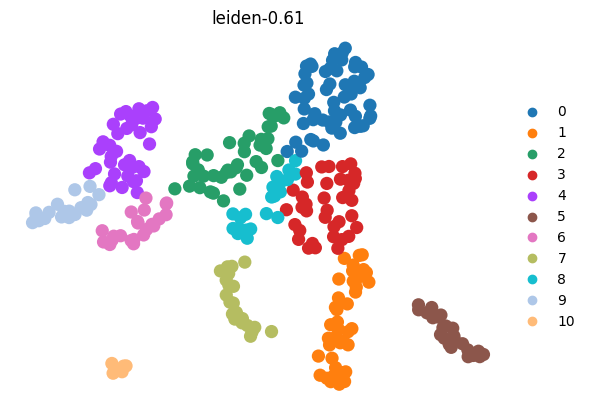

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


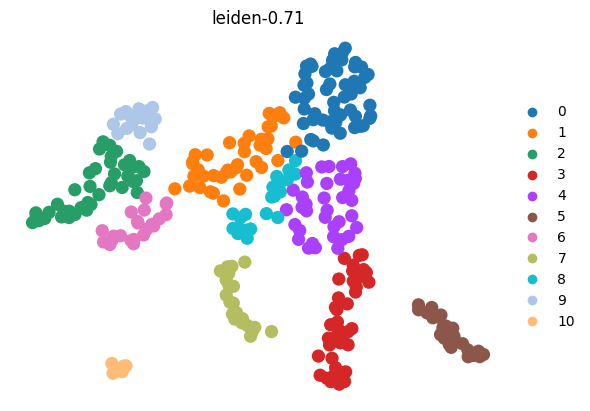

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


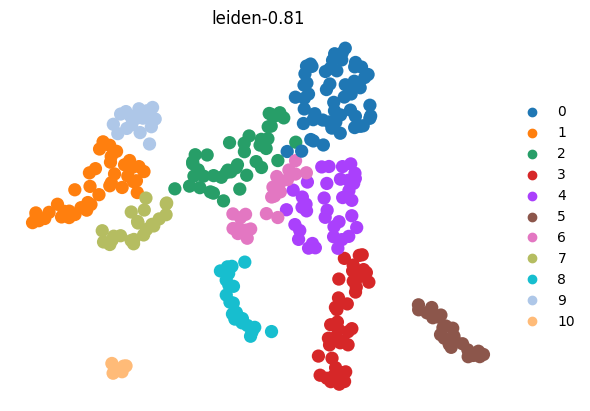

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


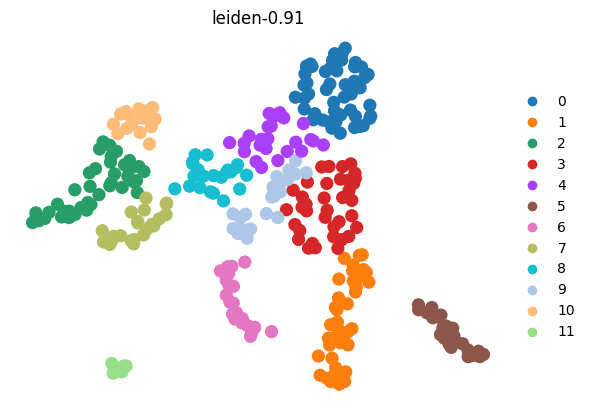

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


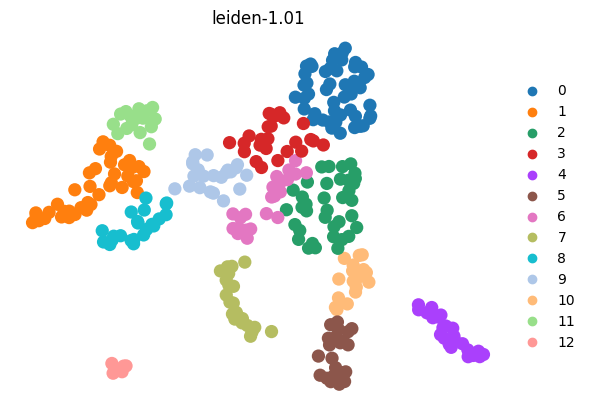

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


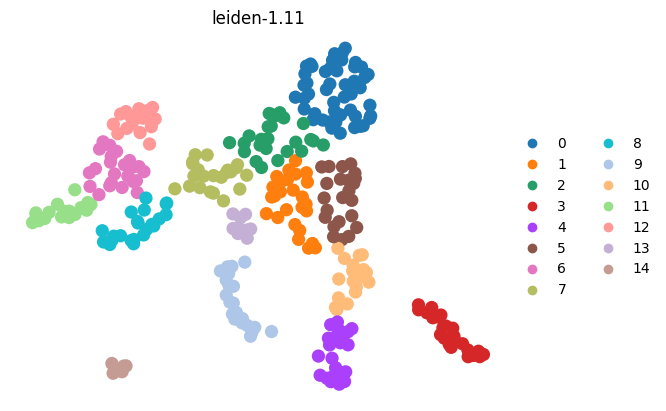

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


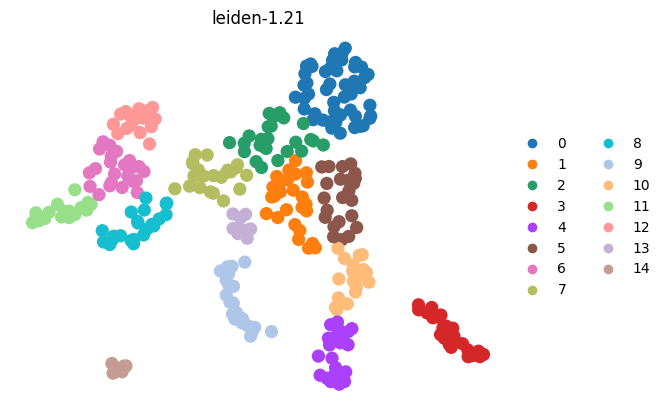

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


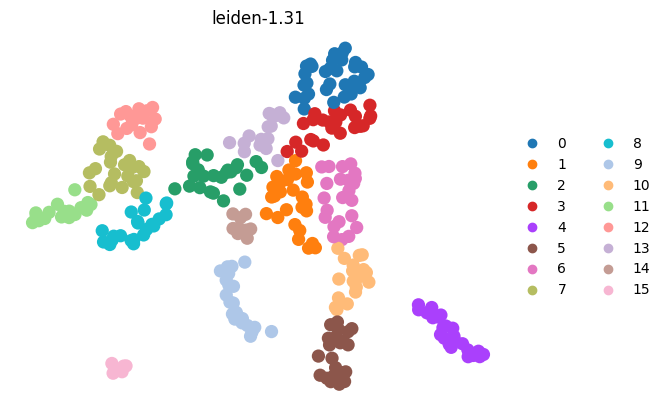

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


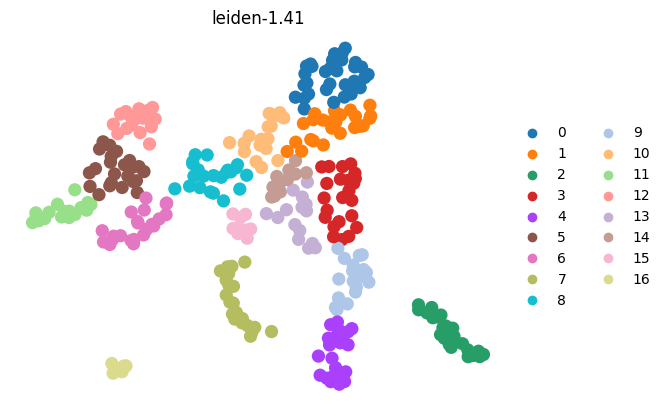

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


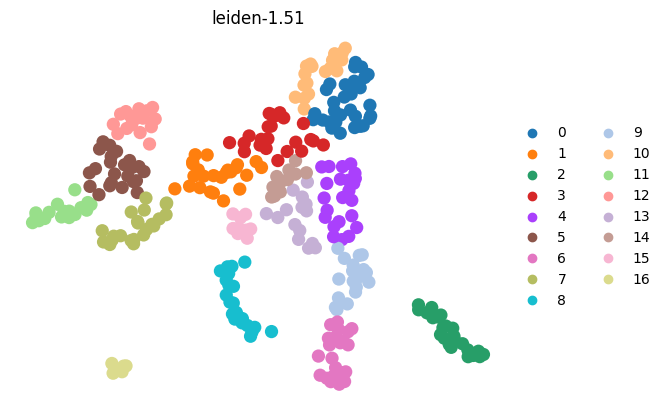

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


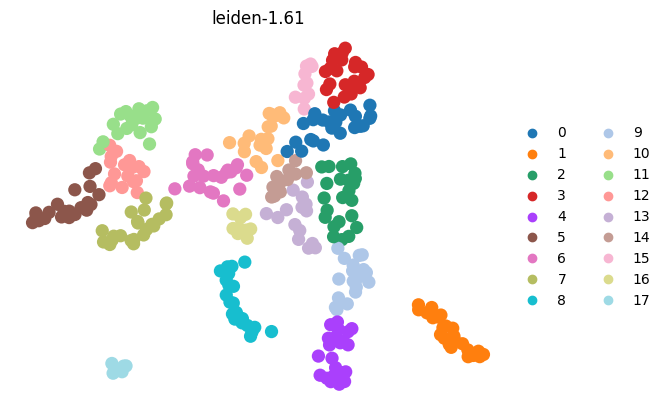

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


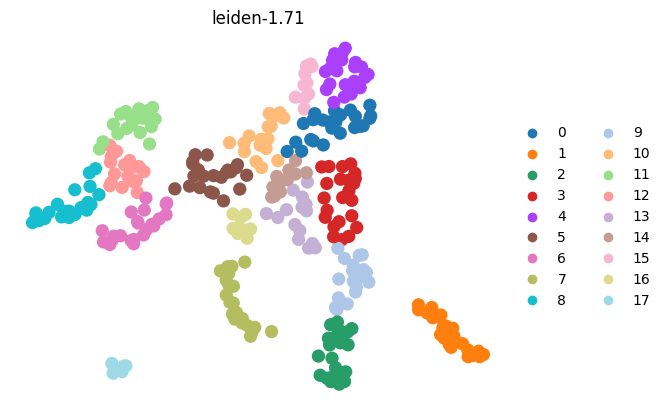

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


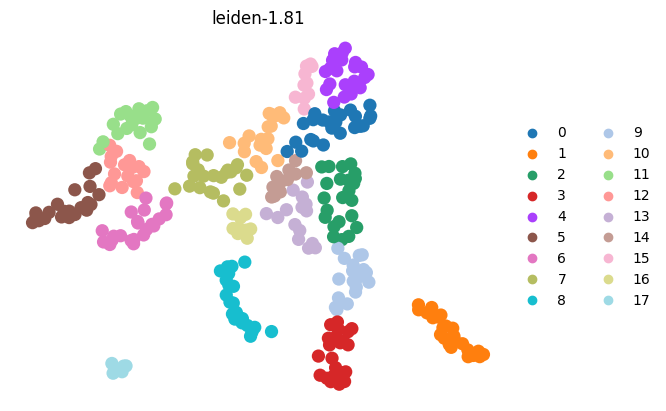

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


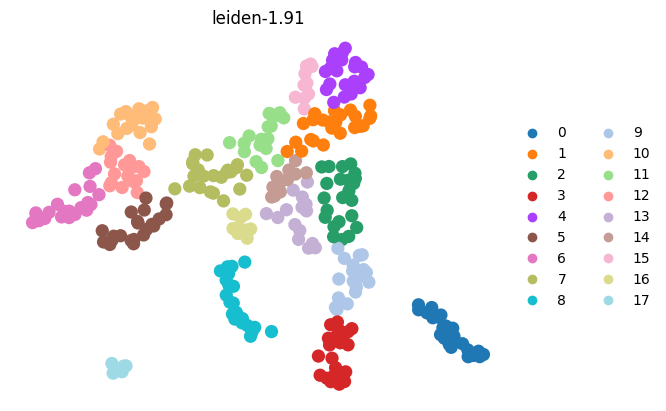

In [32]:
for i in leidenTotal:
   sc.pl.umap(adata_as, color=i, frameon=False) 

In [33]:
dedf={}
for lei in leidenTotal:
    dedf[lei]={}
    sc.tl.rank_genes_groups(adata_as, groupby=lei, method='wilcoxon', key_added = "wilcoxon_"+lei)
    for cl in adata_as.obs[lei].unique():
        dedf[lei][cl] = sc.get.rank_genes_groups_df(adata_as, group=cl, key ='wilcoxon_'+lei)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: Mean of empty slice.
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:324: RuntimeWarning: invalid value encountered in true_divide
  scores[group_index, :] = (
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.l

In [35]:
directory_root = "/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/endothelial/ascites/"

errorDic={}
log_file = directory_root + 'ascites.log'

# Check if the log exists
if os.path.isfile(log_file):
# If it doesn't exist, create it
    os.remove(log_file)

logging.basicConfig(filename=log_file, level=logging.INFO) 
                    # format='%(ascites)s %(levelname)s %(name)s %(message)s')
logger=logging.getLogger(__name__)

for lei in leidenTotal:
    errorDic[lei]={}
    directory = directory_root + lei
    # Check if the directory exists
    if not os.path.exists(directory):
        # If it doesn't exist, create it
        os.makedirs(directory)
    else:
        shutil.rmtree(directory)
        os.makedirs(directory)
    for cl in adata_as.obs[lei].unique():
        dedf[lei][cl] = sc.get.rank_genes_groups_df(adata_as, group=cl, key ='wilcoxon_'+lei)
        dedf[lei][cl].to_csv(directory + '/rank_gene_groups_df_' + cl + '.csv')
        try:
            # print(dedf[lei][cl])
            threshold1 = dedf[lei][cl].dropna(axis='rows')
            threshold2 = threshold1.loc[(threshold1['logfoldchanges'] > 1) & (threshold1['logfoldchanges'] < 100), :]
            threshold3 = threshold2.loc[threshold2['scores'] > 5, :]
            threshold4 = threshold3.loc[threshold3['pvals_adj'] < 0.05, :]
            # break
            print('{}_{}_{}_{}'.format(lei, cl, threshold4.shape[0], threshold4.scores.min()))
            # ontologia di (dedf[lei][cl])
            gp = GProfiler(return_dataframe=True)
            query = threshold4.names.to_list()
            ontology = gp.profile(organism='hsapiens', 
                                    query=query, 
                                    no_evidences=False, 
                                    background=adata_as.var_names.to_list(),
                                    sources=['GO:CC', 'GO:BP', 'GO:MF','REAC','KEGG'])
            ontology.to_csv(directory + '/gprofiler_' + cl + '.csv')
            if ontology.shape[0] > 0:
                plot_enrich(ontology, filename=directory + '/ontology_' + cl + '.png')
            else:
                logger.info('leiden {} cluster {}'.format(lei, cl))
                logger.info('ontology empty')
            
            
            errorDic[lei][cl]={}

        except Exception as e:
            errorDic[lei][cl]=e
            # with open(directory + '/ontology_' + cl + '.log', 'w') as f:
            #     f.write('error')
            logger.info('leiden {} cluster {}'.format(lei, cl))
            logger.error(e)
            continue

logging.shutdown()


leiden-0.01_0_0_nan
leiden-0.11_0_53_5.085893630981445
leiden-0.11_1_5694_5.011247158050537
leiden-0.11_3_3068_5.001507759094238
leiden-0.11_2_7265_5.003021240234375
leiden-0.11_4_3298_5.000349998474121
leiden-0.21_0_25_5.048087120056152
leiden-0.21_1_5694_5.011247158050537
leiden-0.21_4_3068_5.001507759094238
leiden-0.21_3_7265_5.003021240234375
leiden-0.21_5_3298_5.000349998474121
leiden-0.21_2_183_5.001875877380371
leiden-0.31_4_21_5.040560245513916
leiden-0.31_5_5775_5.0016984939575195
leiden-0.31_1_6342_5.003350257873535
leiden-0.31_6_3068_5.001507759094238
leiden-0.31_3_5157_5.001385688781738
leiden-0.31_2_30_5.050254821777344
leiden-0.31_8_0_nan
leiden-0.31_7_1680_5.000349998474121
leiden-0.31_0_174_5.006413459777832
leiden-0.41_4_21_5.040560245513916
leiden-0.41_5_5775_5.0016984939575195
leiden-0.41_1_6342_5.003350257873535
leiden-0.41_6_3068_5.001507759094238
leiden-0.41_3_5157_5.001385688781738
leiden-0.41_2_30_5.050254821777344
leiden-0.41_8_0_nan
leiden-0.41_7_1680_5.000349

In [36]:
logging.shutdown()

In [37]:
adata_as.write_h5ad('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/downstream/clustering/endothelial/adata_ascites_embeddings.h5ad')